# Mel Jensen

## Research question/interests

My main research question is 'Is there a link between the different age groups and their personality traits?' I am interested in this as I want to see if there is a link between the age of people and what their traits are. This could show if there is any link between how someone was raised, I.E. what parenting style was used at that time, and how they now behave. This could show if there is any truth behind statments people try to make about this, like "When I was a kid...".

I am going to average the collected data between each personality trait and compare it to the ages of the participants.

## EDA

In [1]:
# Import needed libtraries
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read file
file = ('../data/raw/data.csv')
df = pd.read_csv(file, sep='\t')

In [3]:
df.shape

(19719, 57)

In [4]:
df.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [5]:
df.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='object')

In [6]:
df.nunique(axis=0)

race        14
age        104
engnat       3
gender       4
hand         4
source       5
country    158
E1           6
E2           6
E3           6
E4           6
E5           6
E6           6
E7           6
E8           6
E9           6
E10          6
N1           6
N2           6
N3           6
N4           6
N5           6
N6           6
N7           6
N8           6
N9           6
N10          6
A1           6
A2           6
A3           6
A4           6
A5           6
A6           6
A7           6
A8           6
A9           6
A10          6
C1           6
C2           6
C3           6
C4           6
C5           6
C6           6
C7           6
C8           6
C9           6
C10          6
O1           6
O2           6
O3           6
O4           6
O5           6
O6           6
O7           6
O8           6
O9           6
O10          6
dtype: int64

In [7]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,...,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,5.324205,50767.027892,1.365130,1.616918,1.130128,1.952280,2.628937,2.759724,3.416755,3.152036,...,3.692479,2.149653,4.126122,2.079416,3.873016,1.794766,4.072975,3.208023,4.133577,4.004767
std,4.019064,7121271.921824,0.488796,0.499122,0.413663,1.504770,1.232565,1.313818,1.236820,1.222822,...,1.116302,1.135227,1.006806,1.109751,0.939655,1.068513,0.923595,1.258921,0.982868,0.983729
min,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,22.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,4.000000,3.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,8.000000,31.000000,2.000000,2.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,13.000000,999999999.000000,2.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


From these quick anylysis' it can be seen that most of the rows have 0 as the minimum value. These values are unanswered questions and they should be removed for proper anaylisis.
I also noticed that the age coloumn has an alarminly high max and mean and in order to use this column for my analysis I will need to remove numbers higher than a normal human lifespan.
The rest of the numbers are what I would expect knowing the given data.

## I need to remove rows that have a 0 as 0 indicates missed values

In [8]:
dfnoZero = df.loc[(df!=0).all(axis=1)]
dfnoZero.index=range(19384)
dfnoZero

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19379,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19380,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19381,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19382,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


## Delete ages that are over 100 (less likely to be a proper data entry)

In [9]:
# I noticed that some of the ages were incorrect values (ex. 999999999, and values that looked like birth years)
# So I took out this data
usableData = dfnoZero[dfnoZero.age <= 100]
usableData.index=range(19305)
usableData

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19301,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19302,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19303,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


In [10]:
usableData.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,...,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000
mean,5.353484,26.227558,1.370008,1.617871,1.135664,1.951671,2.628956,2.760373,3.417871,3.154157,...,3.696866,2.146542,4.127843,2.076353,3.874281,1.793939,4.076198,3.210567,4.135354,4.006423
std,4.001358,11.522396,0.482819,0.495945,0.405853,1.504688,1.232150,1.313236,1.235065,1.222230,...,1.114044,1.133551,1.006776,1.108389,0.939693,1.067750,0.920507,1.257449,0.980997,0.983104
min,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,22.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,4.000000,3.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,9.000000,31.000000,2.000000,2.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,13.000000,100.000000,2.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The new mins, maxs and average now look like proper data, so this is the data I will be using moving forward

## Defining which columns go with which trait
### E = Extroversion
### N = Neruoticism
### A = Agreeableness
### C = Conscientiousness
### O = Openness to Experience

## Which columns are positive vs negative attributes
A1 -  &nbsp; &nbsp;E1 +  &nbsp; &nbsp;C1 +<br/>
A2 +  &nbsp; &nbsp;E2 -  &nbsp; &nbsp;C2 -<br/>
A3 -  &nbsp; &nbsp;E3 +  &nbsp; &nbsp;C3 +<br/>
A4 +  &nbsp; &nbsp;E4 -  &nbsp; &nbsp;C4 -<br/>
A5 -  &nbsp; &nbsp;E5 +  &nbsp; &nbsp;C5 +<br/>
A6 +  &nbsp; &nbsp;E6 -  &nbsp; &nbsp;C6 -<br/>
A7 -  &nbsp; &nbsp;E7 +  &nbsp; &nbsp;C7 +<br/>
A8 +  &nbsp; &nbsp;E8 -  &nbsp; &nbsp;C8 -<br/>
A9 +  &nbsp; &nbsp;E9 +  &nbsp; &nbsp;C9 +<br/>
A10 +  &nbsp; &nbsp;E10 -  &nbsp; &nbsp;C10 +<br/>
O1 +  &nbsp; &nbsp;N1 -  &nbsp; &nbsp;<br/>
O2 -  &nbsp; &nbsp;N2 +  &nbsp; &nbsp;<br/>
O3 +  &nbsp; &nbsp;N3 -  &nbsp; &nbsp;<br/>
O4 -  &nbsp; &nbsp;N4 +  &nbsp; &nbsp;<br/>
O5 +  &nbsp; &nbsp;N5 -  &nbsp; &nbsp;<br/>
O6 -  &nbsp; &nbsp;N6 -  &nbsp; &nbsp;<br/>
O7 +  &nbsp; &nbsp;N7 -  &nbsp; &nbsp;<br/>
O8 +  &nbsp; &nbsp;N8 -  &nbsp; &nbsp;<br/>
O9 +  &nbsp; &nbsp;N9 -  &nbsp; &nbsp;<br/>
O10 +  &nbsp; &nbsp;N10 -  &nbsp; &nbsp;<br/>

In [11]:
## From these I need to pull the values convert them to negative values if needed

NewA1=-(usableData['A1'])
NewA2=(usableData['A2'])
NewA3=-(usableData['A3'])
NewA4=(usableData['A4'])
NewA5=-(usableData['A5'])
NewA6=(usableData['A6'])
NewA7=-(usableData['A7'])
NewA8=(usableData['A8'])
NewA9=(usableData['A9'])
NewA10=(usableData['A10'])
NewO1=(usableData['O1'])
NewO2=-(usableData['O2'])
NewO3=(usableData['O3'])
NewO4=-(usableData['O4'])
NewO5=(usableData['O5'])
NewO6=-(usableData['O6'])
NewO7=(usableData['O7'])
NewO8=(usableData['O8'])
NewO9=(usableData['O9'])
NewO10=(usableData['O10'])
NewE1=(usableData['E1'])
NewE2=-(usableData['E2'])
NewE3=(usableData['E3'])
NewE4=-(usableData['E4'])
NewE5=(usableData['E5'])
NewE6=-(usableData['E6'])
NewE7=(usableData['E7'])
NewE8=-(usableData['E8'])
NewE9=(usableData['E9'])
NewE10=-(usableData['E10'])
NewN1=-(usableData['N1'])
NewN2=(usableData['N2'])
NewN3=-(usableData['N3'])
NewN4=(usableData['N4'])
NewN5=-(usableData['N5'])
NewN6=-(usableData['N6'])
NewN7=-(usableData['N7'])
NewN8=-(usableData['N8'])
NewN9=-(usableData['N9'])
NewN10=-(usableData['N10'])
NewC1=(usableData['C1'])
NewC2=-(usableData['C2'])
NewC3=(usableData['C3'])
NewC4=-(usableData['C4'])
NewC5=(usableData['C5'])
NewC6=-(usableData['C6'])
NewC7=(usableData['C7'])
NewC8=-(usableData['C8'])
NewC9=(usableData['C9'])
NewC10=(usableData['C10'])

In [12]:
## Dataframe with A values
Aframes=[NewA1, NewA2, NewA3, NewA4, NewA5, NewA6, NewA7, NewA8, NewA9, NewA10]
Aframe = pd.concat(Aframes, axis=1)
## Dataframe with O values
Oframes=[NewO1, NewO2, NewO3, NewO4, NewO5, NewO6, NewO7, NewO8, NewO9, NewO10]
Oframe = pd.concat(Oframes, axis=1)
## Dataframe with E values
Eframes=[NewE1, NewE2, NewE3, NewE4, NewE5, NewE6, NewE7, NewE8, NewE9, NewE10]
Eframe = pd.concat(Eframes, axis=1)
## Dataframe with N values
Nframes=[NewN1, NewN2, NewN3, NewN4, NewN5, NewN6, NewN7, NewN8, NewN9, NewN10]
Nframe = pd.concat(Nframes, axis=1)
## Dataframe with C values
Cframes=[NewC1, NewC2, NewC3, NewC4, NewC5, NewC6, NewC7, NewC8, NewC9, NewC10]
Cframe = pd.concat(Cframes, axis=1)

In [13]:
## Sum A values
sumA = Aframe.sum(axis = 1)
## Sum O values
sumO = Oframe.sum(axis = 1)
## Sum E values
sumE = Eframe.sum(axis = 1)
## Sum N values
sumN = Nframe.sum(axis = 1)
## Sum C values
sumC = Cframe.sum(axis = 1)

In [14]:
## Dataframe with total scores
sumframes=[sumA, sumO, sumE, sumN, sumC]
sumframe = pd.concat(sumframes, axis=1)
sumframe = sumframe.rename(columns={0:'sumA', 1:'sumO', 2:'sumE', 3:'sumN', 4:'sumC'})
sumframe

,sumA,sumO,sumE,sumN,sumC
0,22,25,14,1,23
1,11,8,-8,-19,18
2,14,27,5,-34,25
3,13,23,-8,-31,2
4,20,16,4,-18,10
...,...,...,...,...,...
19300,18,17,-9,-29,12
19301,12,12,-5,-9,8
19302,2,19,-9,-38,-1
19303,14,24,-9,-28,19


In [15]:
# Pull the age data from the non-zero dataframe
ageframe=(usableData['age'])
ageframe

0        53
1        46
2        14
3        19
4        25
         ..
19300    15
19301    37
19302    16
19303    16
19304    35
Name: age, Length: 19305, dtype: int64

In [16]:
# Merge the scores and ages into new data frame
agevpers = [sumframe, ageframe]
agevpersonality = pd.concat(agevpers, axis=1)

In [19]:
#Sort the data to veiw it easier
sortedAge = agevpersonality.sort_values(by=['age'])
sortedAge.index=range(19305)
sortedAge

,sumA,sumO,sumE,sumN,sumC,age
0,8,9,6,-17,8,13
1,11,12,7,-30,10,13
2,-1,4,9,-14,5,13
3,13,14,-3,-14,16,13
4,16,-1,13,-25,-4,13
...,...,...,...,...,...,...
19300,15,8,7,-15,2,80
19301,10,20,0,-30,10,92
19302,6,12,0,-18,6,97
19303,21,31,7,-23,20,99


<AxesSubplot:xlabel='age', ylabel='sumA'>

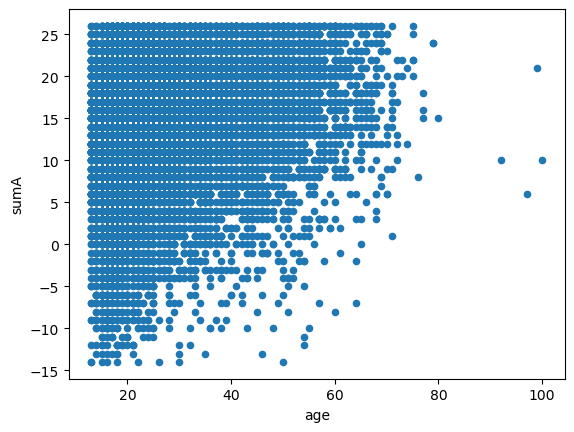

In [21]:
sortedAge.plot(kind='scatter', x='age', y='sumA')

<AxesSubplot:xlabel='age', ylabel='sumO'>

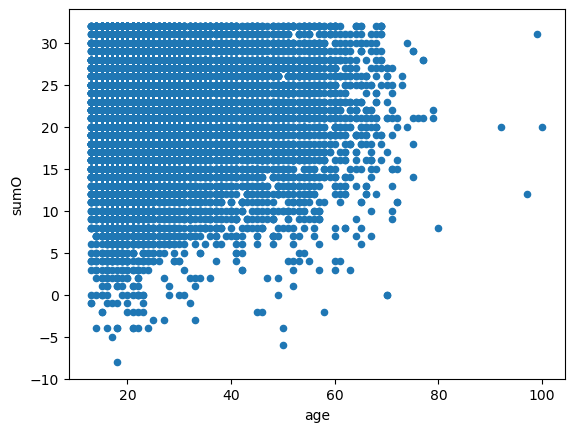

In [22]:
sortedAge.plot(kind='scatter', x='age', y='sumO')

<AxesSubplot:xlabel='age', ylabel='sumE'>

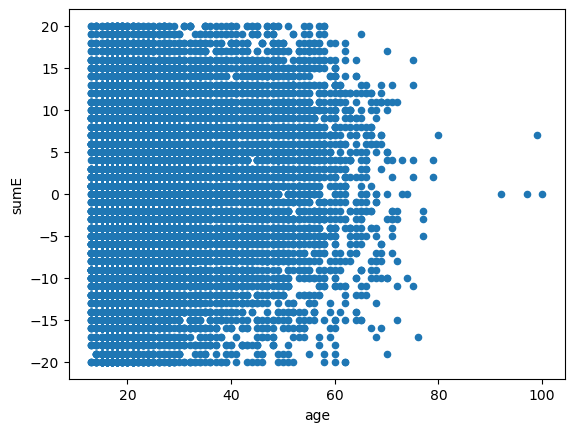

In [23]:
sortedAge.plot(kind='scatter', x='age', y='sumE')

<AxesSubplot:xlabel='age', ylabel='sumN'>

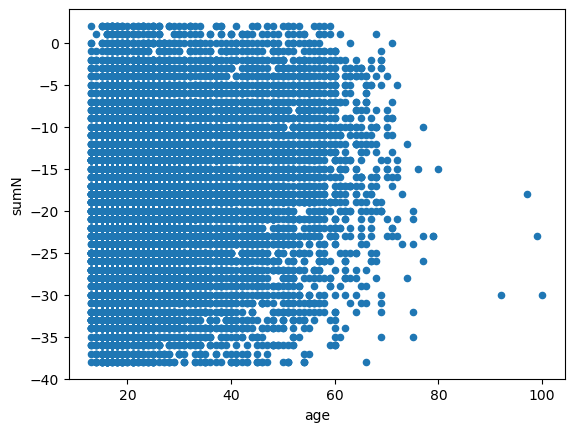

In [24]:
sortedAge.plot(kind='scatter', x='age', y='sumN')

<AxesSubplot:xlabel='age', ylabel='sumC'>

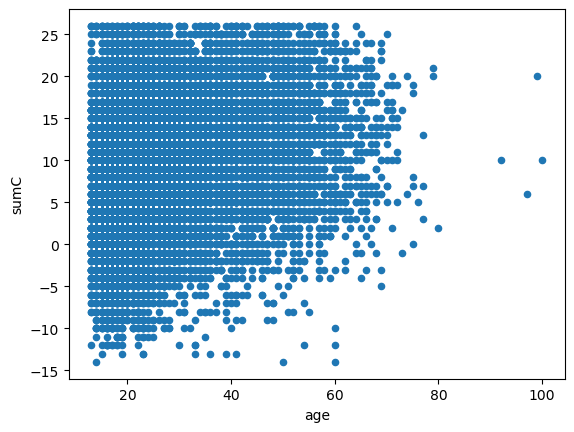

In [25]:
sortedAge.plot(kind='scatter', x='age', y='sumC')

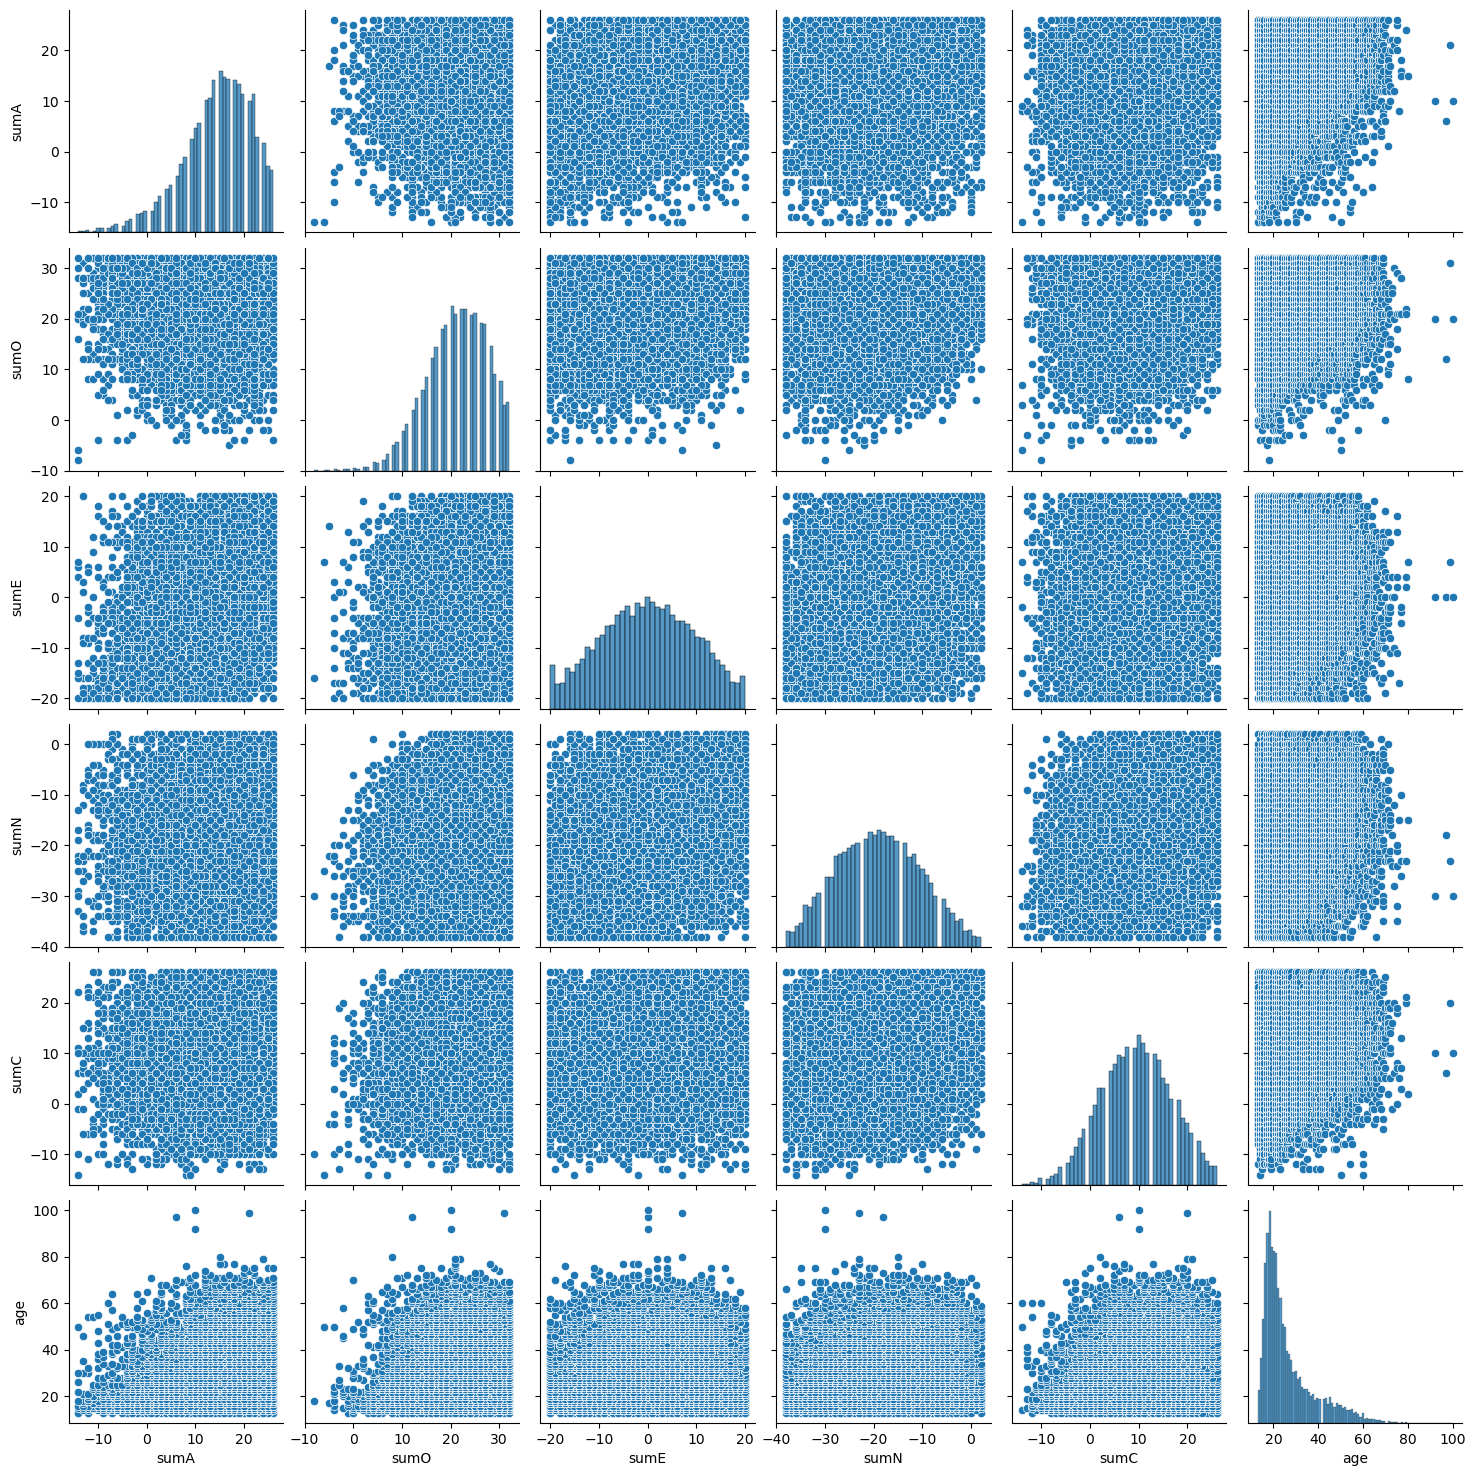

In [26]:
sns.pairplot(sortedAge)

These graphs are showing some patterns between the ages and total scores, but I think it would be easier to veiw with less data to look at. I will group the ages and average the score amosnt those ages

In [27]:
#Just to see how many different data points were in each column
sortedAge.nunique(axis=0)

sumA    41
sumO    40
sumE    41
sumN    41
sumC    41
age     71
dtype: int64

In [28]:
# What those data values are
print(sortedAge.apply(lambda col: col.unique()))

sumA    [8, 11, -1, 13, 16, 12, 9, 6, 17, 15, 20, 22, ...
sumO    [9, 12, 4, 14, -1, 18, 15, 27, 11, 29, 13, 8, ...
sumE    [6, 7, 9, -3, 13, 10, 11, 12, 16, 3, -11, -15,...
sumN    [-17, -30, -14, -25, -20, -8, -4, -16, -27, -2...
sumC    [8, 10, 5, 16, -4, -5, 13, 12, 11, 14, 24, 2, ...
age     [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2...
dtype: object


In [29]:
# Sort the data by age group
age1319 = sortedAge[sortedAge.age < 20]

age2029 = sortedAge[sortedAge.age < 30]
age2029 = age2029[age2029.age >= 20]

age3039 = sortedAge[sortedAge.age < 40]
age3039 = age3039[age3039.age >= 30]

age4049 = sortedAge[sortedAge.age < 50]
age4049 = age4049[age4049.age >= 40]

age5059 = sortedAge[sortedAge.age < 60]
age5059 = age5059[age5059.age >= 50]

age6069 = sortedAge[sortedAge.age < 70]
age6069 = age6069[age6069.age >= 60]

age7079 = sortedAge[sortedAge.age < 80]
age7079 = age7079[age7079.age >= 70]

age8089 = sortedAge[sortedAge.age < 90]
age8089 = age8089[age8089.age >= 80]

age90100 = sortedAge[sortedAge.age <= 100]
age90100 = age90100[age90100.age >= 90]


In [30]:
# Find the length of these group so I can average them
print(age1319.shape)
print(age2029.shape)
print(age3039.shape)
print(age4049.shape)
print(age5059.shape)
print(age6069.shape)
print(age7079.shape)
print(age8089.shape)
print(age90100.shape)

(6642, 6)
(7428, 6)
(2514, 6)
(1516, 6)
(870, 6)
(287, 6)
(43, 6)
(1, 6)
(4, 6)


In [31]:
# Average of each age groups total scores
teensA = sum(age1319['sumA'])/6642
teensO = sum(age1319['sumO'])/6642
teensE = sum(age1319['sumE'])/6642
teensN = sum(age1319['sumN'])/6642
teensC = sum(age1319['sumC'])/6642
twentysA = sum(age2029['sumA'])/7428
twentysO = sum(age2029['sumO'])/7428
twentysE = sum(age2029['sumE'])/7428
twentysN = sum(age2029['sumN'])/7428
twentysC = sum(age2029['sumC'])/7428
thirtysA = sum(age3039['sumA'])/2514
thirtysO = sum(age3039['sumO'])/2514
thirtysE = sum(age3039['sumE'])/2514
thirtysN = sum(age3039['sumN'])/2514
thirtysC = sum(age3039['sumC'])/2514
fortysA = sum(age4049['sumA'])/1516
fortysO = sum(age4049['sumO'])/1516
fortysE = sum(age4049['sumE'])/1516
fortysN = sum(age4049['sumN'])/1516
fortysC = sum(age4049['sumC'])/1516
fiftysA = sum(age5059['sumA'])/870
fiftysO = sum(age5059['sumO'])/870
fiftysE = sum(age5059['sumE'])/870
fiftysN = sum(age5059['sumN'])/870
fiftysC = sum(age5059['sumC'])/870
sixtysA = sum(age6069['sumA'])/287
sixtysO = sum(age6069['sumO'])/287
sixtysE = sum(age6069['sumE'])/287
sixtysN = sum(age6069['sumN'])/287
sixtysC = sum(age6069['sumC'])/287
seventysA = sum(age7079['sumA'])/43
seventysO = sum(age7079['sumO'])/43
seventysE = sum(age7079['sumE'])/43
seventysN = sum(age7079['sumN'])/43
seventysC = sum(age7079['sumC'])/43
eightysA = sum(age8089['sumA'])/1
eightysO = sum(age8089['sumO'])/1
eightysE = sum(age8089['sumE'])/1
eightysN = sum(age8089['sumN'])/1
eightysC = sum(age8089['sumC'])/1
ninetysA = sum(age90100['sumA'])/4
ninetysO = sum(age90100['sumO'])/4
ninetysE = sum(age90100['sumE'])/4
ninetysN = sum(age90100['sumN'])/4
ninetysC = sum(age90100['sumC'])/4

In [48]:
# create data frame from these averages
teens = pd.DataFrame({'A':[teensA], 'O':[teensO], 'E':[teensE], 'N':[teensN], 'C':[teensC], 'age':'13-19'})

twentys = pd.DataFrame({'A':[twentysA], 'O':[twentysO], 'E':[twentysE], 'N':[twentysN], 'C':[twentysC], 'age':'20-29'})

thirtys = pd.DataFrame({'A':[thirtysA], 'O':[thirtysO], 'E':[thirtysE], 'N':[thirtysN], 'C':[thirtysC], 'age':'30-39'})

fortys = pd.DataFrame({'A':[fortysA], 'O':[fortysO], 'E':[fortysE], 'N':[fortysN], 'C':[fortysC], 'age':'40-49'})

fiftys = pd.DataFrame({'A':[fiftysA], 'O':[fiftysO], 'E':[fiftysE], 'N':[fiftysN], 'C':[fiftysC], 'age':'50-59'})

sixtys = pd.DataFrame({'A':[sixtysA], 'O':[sixtysO], 'E':[sixtysE], 'N':[sixtysN], 'C':[sixtysC], 'age':'60-69'})

seventys = pd.DataFrame({'A':[seventysA], 'O':[seventysO], 'E':[seventysE], 'N':[seventysN], 'C':[seventysC], 'age':'70-79'})

eightys = pd.DataFrame({'A':[eightysA], 'O':[eightysO], 'E':[eightysE], 'N':[eightysN], 'C':[eightysC], 'age':'80-89'})

ninetys = pd.DataFrame({'A':[ninetysA], 'O':[ninetysO], 'E':[ninetysE], 'N':[ninetysN], 'C':[ninetysC], 'age':'90-100'})


In [49]:
#combine these frames to create the dataframe with just the data I want to use
agevper=[teens, twentys, thirtys, fortys, fiftys, sixtys, seventys, eightys, ninetys]
agevperson = pd.concat(agevper, axis=0)
agevperson

,A,O,E,N,C,age
0,13.254140,20.548630,-0.962060,-20.301566,7.664709,13-19
0,14.444534,21.012789,0.204631,-19.081449,9.497577,20-29
0,15.367542,21.902944,0.665871,-18.115752,11.022275,30-39
0,16.114776,22.067942,1.747361,-16.866095,11.982850,40-49
0,16.997701,22.039080,2.581609,-15.300000,12.720690,50-59
0,17.432056,22.059233,1.637631,-15.275261,12.494774,60-69
0,16.860465,20.000000,-0.395349,-16.813953,12.651163,70-79
0,15.000000,8.000000,7.000000,-15.000000,2.000000,80-89
0,11.750000,20.750000,1.750000,-25.250000,11.500000,90-100


<AxesSubplot:xlabel='age', ylabel='A'>

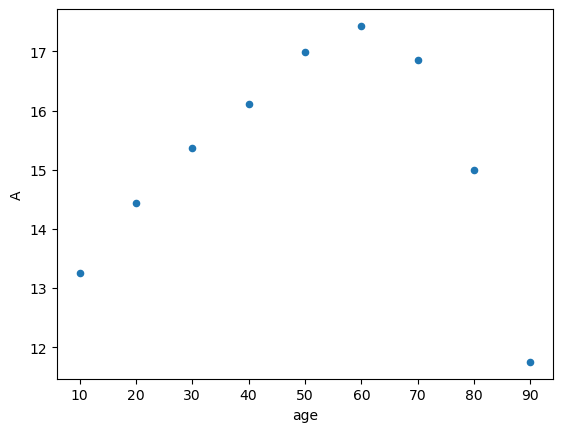

In [42]:
agevperson.plot(kind='scatter', x='age', y='A')

<AxesSubplot:xlabel='age', ylabel='O'>

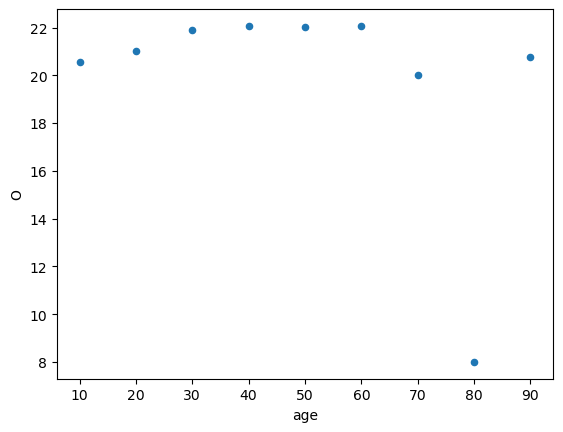

In [43]:
agevperson.plot(kind='scatter', x='age', y='O')

<AxesSubplot:xlabel='age', ylabel='E'>

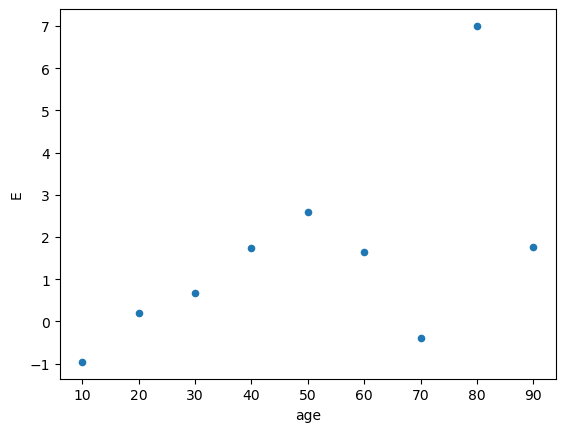

In [44]:
agevperson.plot(kind='scatter', x='age', y='E')

<AxesSubplot:xlabel='age', ylabel='N'>

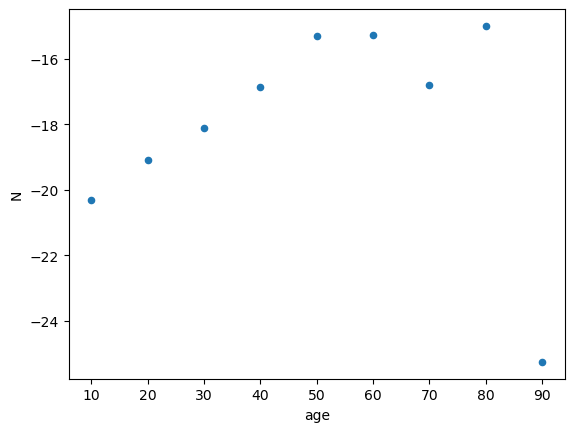

In [45]:
agevperson.plot(kind='scatter', x='age', y='N')

<AxesSubplot:xlabel='age', ylabel='C'>

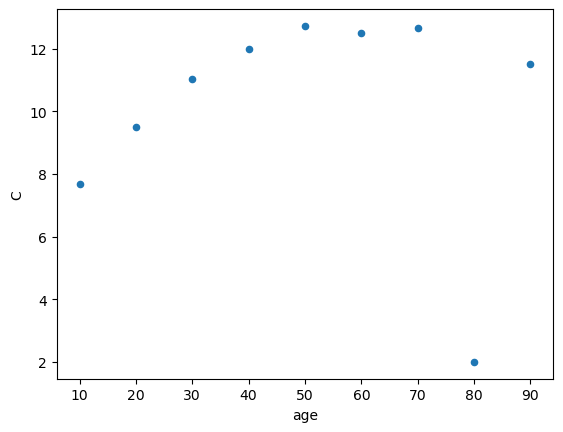

In [46]:
agevperson.plot(kind='scatter', x='age', y='C')

Viewing these with lines might be easier

<AxesSubplot:xlabel='age', ylabel='A'>

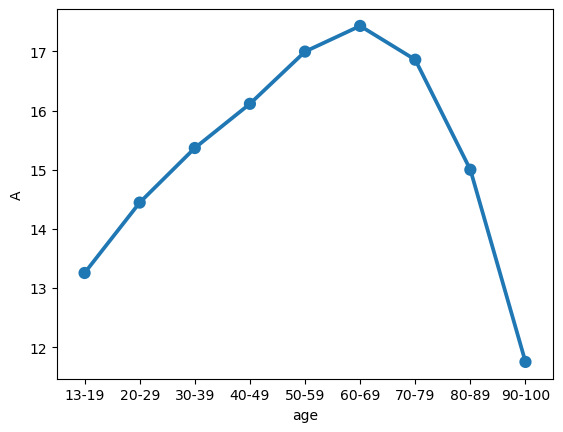

In [50]:
# Plot of age group vs their 'A' score
sns.pointplot(data=agevperson, x='age', y='A')

<AxesSubplot:xlabel='age', ylabel='O'>

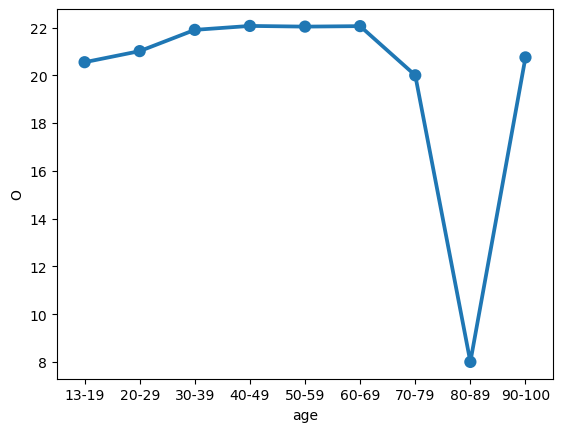

In [51]:
# Plot of age group vs their 'O' score
sns.pointplot(data=agevperson, x='age', y='O')

<AxesSubplot:xlabel='age', ylabel='E'>

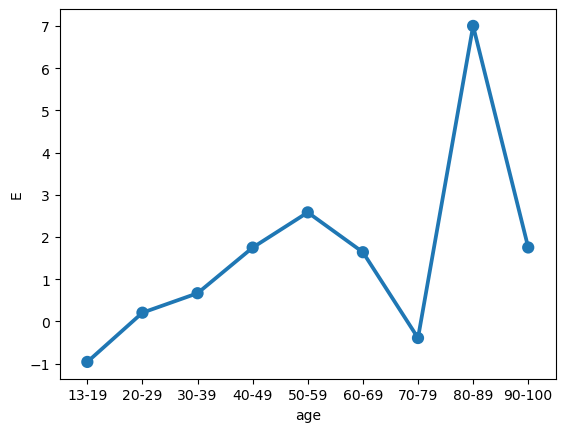

In [52]:
# Plot of age group vs their 'E' score
sns.pointplot(data=agevperson, x='age', y='E')

<AxesSubplot:xlabel='age', ylabel='N'>

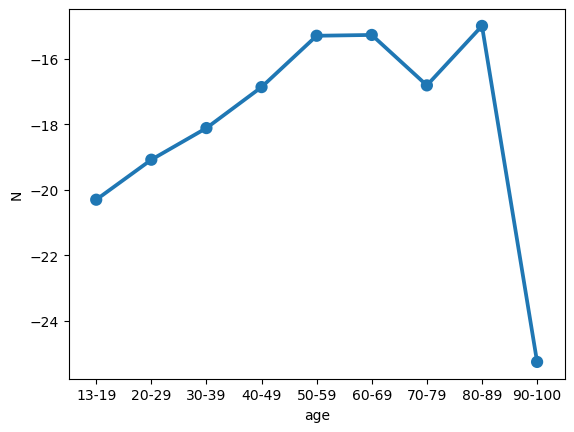

In [53]:
# Plot of age group vs their 'N' score
sns.pointplot(data=agevperson, x='age', y='N')

<AxesSubplot:xlabel='age', ylabel='C'>

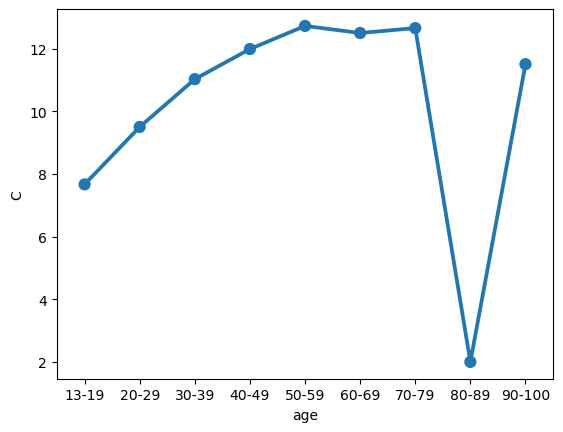

In [54]:
# Plot of age group vs their 'C' score
sns.pointplot(data=agevperson, x='age', y='C')

I need to keep in mind that this data only had one point for ages between 80-89